# Time series analysis with SARIMA


## Import libraries and get sample data

In [1]:
# Import libraries
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt

# Defaults
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load the data
df = pd.read_csv("velo2021.csv")

from preprocess import *

preprocess(df)






/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/content/preprocess.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time']=df['Time'].replace('', np.nan)
/content/prep

,TodayTotal,DayofWeek,Day,Month,Year,Hour,Minute
Time,,,,,,,
2020-03-12 11:05:00,109.0,3,12,3,2020,11,5
2020-03-12 14:30:00,441.0,3,12,3,2020,14,30
2020-03-13 10:02:00,385.0,4,13,3,2020,10,2
2020-03-13 14:15:00,769.0,4,13,3,2020,14,15
2020-03-13 18:21:00,1286.0,4,13,3,2020,18,21
...,...,...,...,...,...,...,...
2021-03-24 10:08:00,497.0,2,24,3,2021,10,8
2021-03-24 11:18:00,603.0,2,24,3,2021,11,18
2021-03-24 14:46:00,1002.0,2,24,3,2021,14,46


In [3]:
df = preprocess(df)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/content/preprocess.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time']=df['Time'].replace('', np.nan)
/content/prep

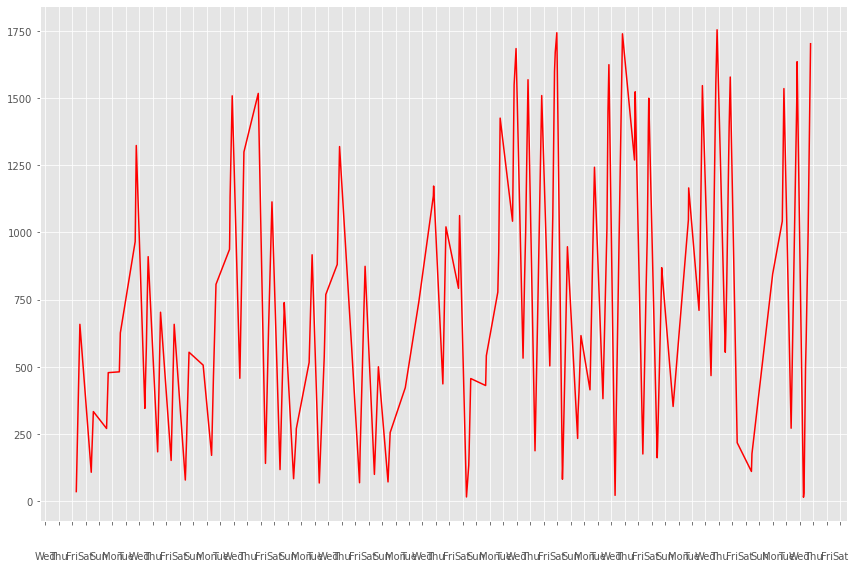

In [4]:
timeseries_plot(df["TodayTotal"][-200:], 'r', '')

In [5]:
bucket_avg(df["TodayTotal"][-200:], "30T")

Time
2021-01-29 07:30:00      35.0
2021-01-29 08:00:00       NaN
2021-01-29 08:30:00       NaN
2021-01-29 09:00:00       NaN
2021-01-29 09:30:00       NaN
                        ...  
2021-03-24 17:00:00       NaN
2021-03-24 17:30:00       NaN
2021-03-24 18:00:00       NaN
2021-03-24 18:30:00    1610.0
2021-03-24 19:00:00    1703.0
Freq: 30T, Name: TodayTotal, Length: 2616, dtype: float64

In [6]:
df["TodayTotal"]

Time
2020-03-12 11:05:00     109.0
2020-03-12 14:30:00     441.0
2020-03-13 10:02:00     385.0
2020-03-13 14:15:00     769.0
2020-03-13 18:21:00    1286.0
                        ...  
2021-03-24 10:08:00     497.0
2021-03-24 11:18:00     603.0
2021-03-24 14:46:00    1002.0
2021-03-24 18:31:00    1610.0
2021-03-24 19:05:00    1703.0
Name: TodayTotal, Length: 1445, dtype: float64

ARIMA(1, 1, 1)x(1, 1, 1, 70)seasonal - AIC:3424.685869594739
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
SARIMAX(1, 1, 1)x(1, 1, 1, 70)seasonal with lowest_AIC:3424.685869594739
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Final model summary:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0629      0.067      0.934      0.350      -0.069       0.195
ma.L1         -0.8320      0.041    -20.221      0.000      -0.913      -0.751
ar.S.L70      -0.0804      0.078     -1.033      0.301      -0.233       0.072
ma.S.L70      -1.0006      0.086    -11.678      0.000      -1.169      -0.833
sigma2      8.893e+04   9.63e-07   9.24e+10      0.000    8.89e+04    8.89e+04
Final model diagnostics:


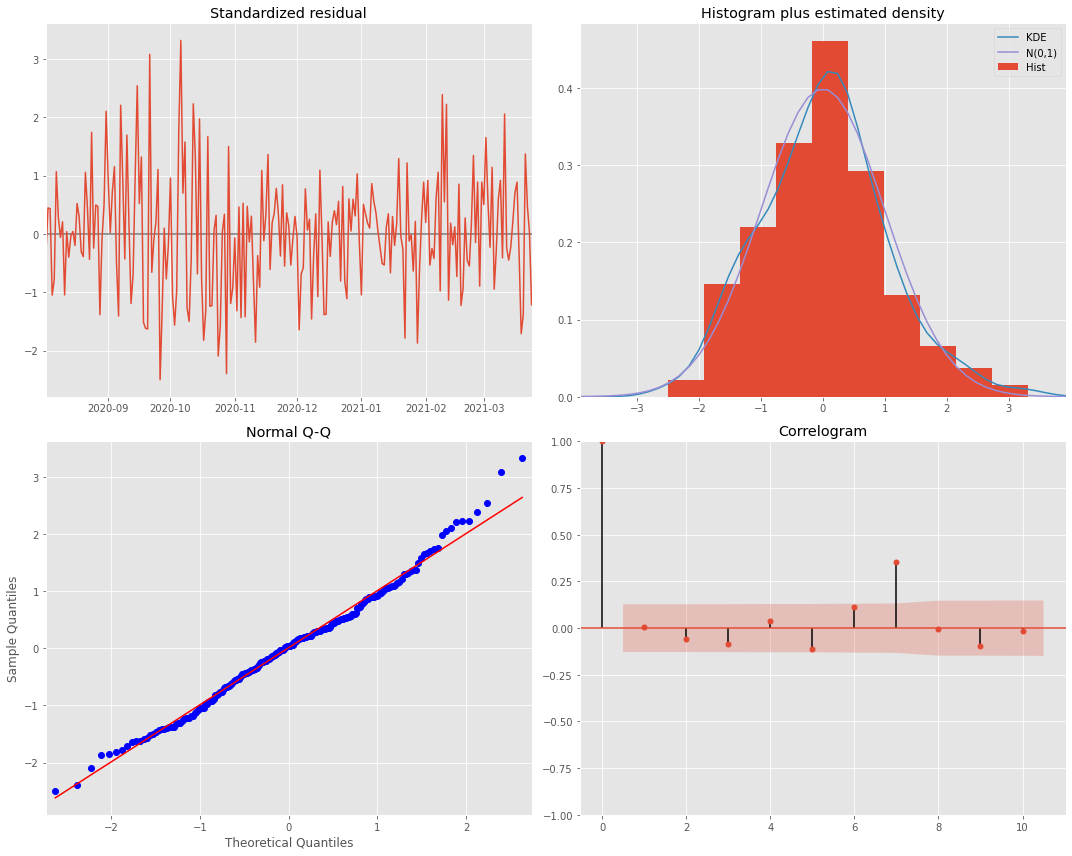

In [7]:
from arima_method import *

bucket_size = 'D'

d_tt = df["TodayTotal"]

df_avg = bucket_avg(d_tt, bucket_size)


arima_param = {}
arima_param['p'] = range(1,2,1)
arima_param['d'] = range(1,2,1)
arima_param['q'] = range(1,2,1)



# the seasonal periodicy is  24 hours

seasonal_param = 70
# round(24*60/float((bucket_size[:-1])))
arima = arima_model(arima_param, seasonal_param)

arima.fit(df_avg)

In [11]:
df_avg.head()

Time
2020-11-23    1047.000000
2020-11-24    1200.000000
2020-11-25     776.666667
2020-11-26     823.000000
2020-11-27     843.500000
Freq: D, Name: TodayTotal, dtype: float64

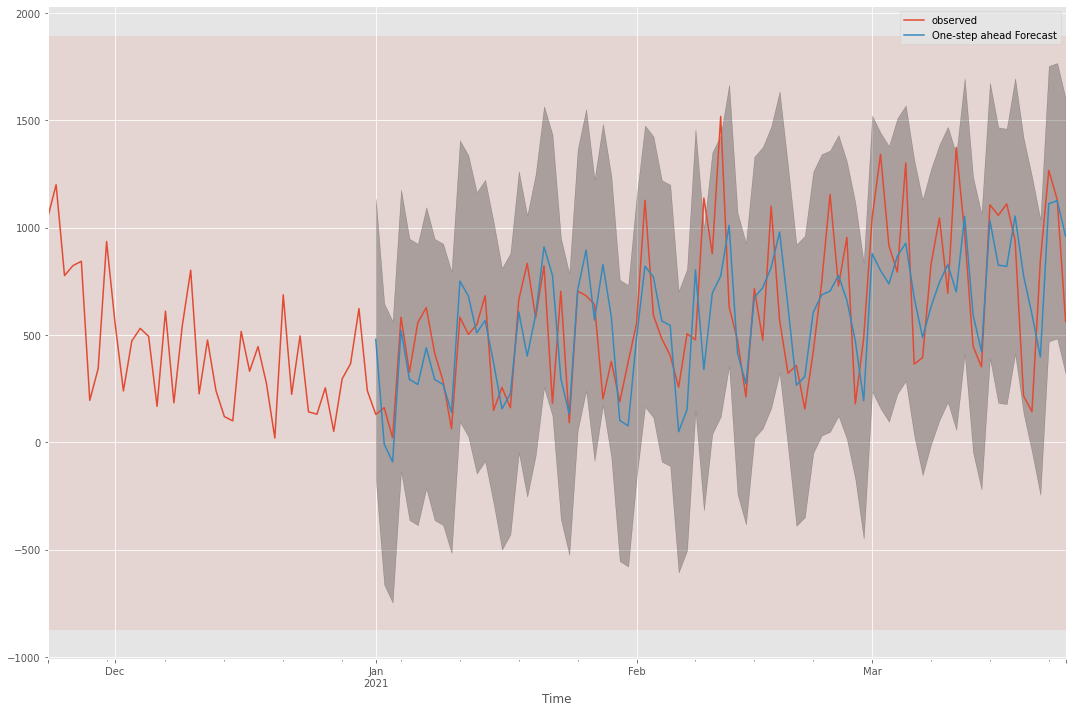

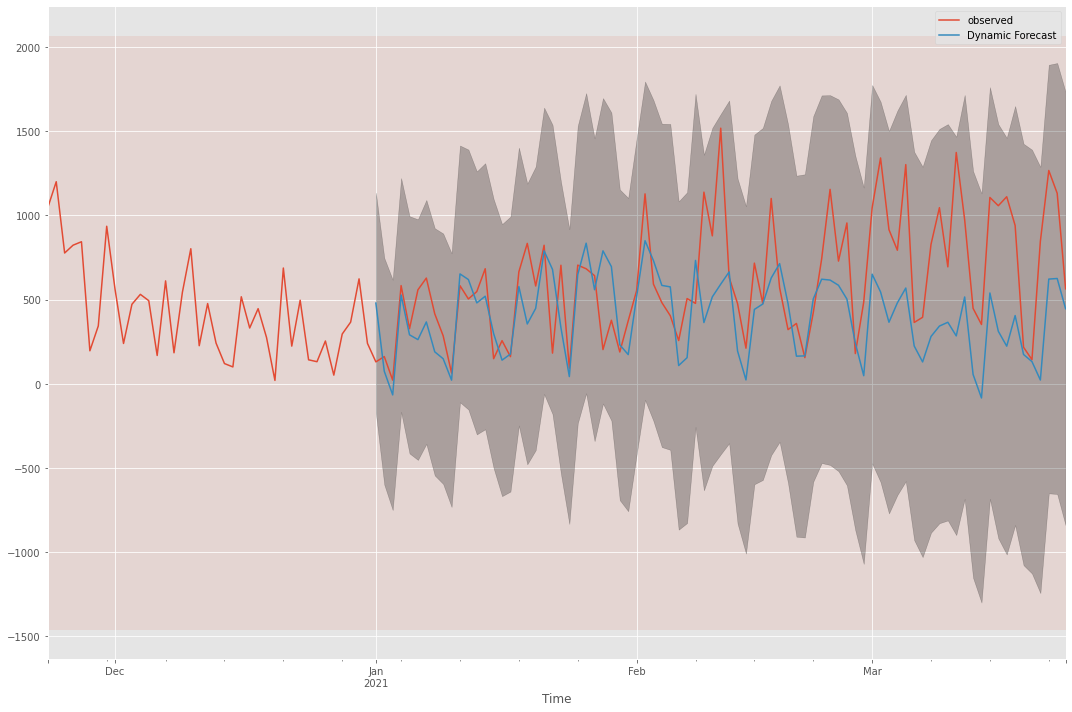

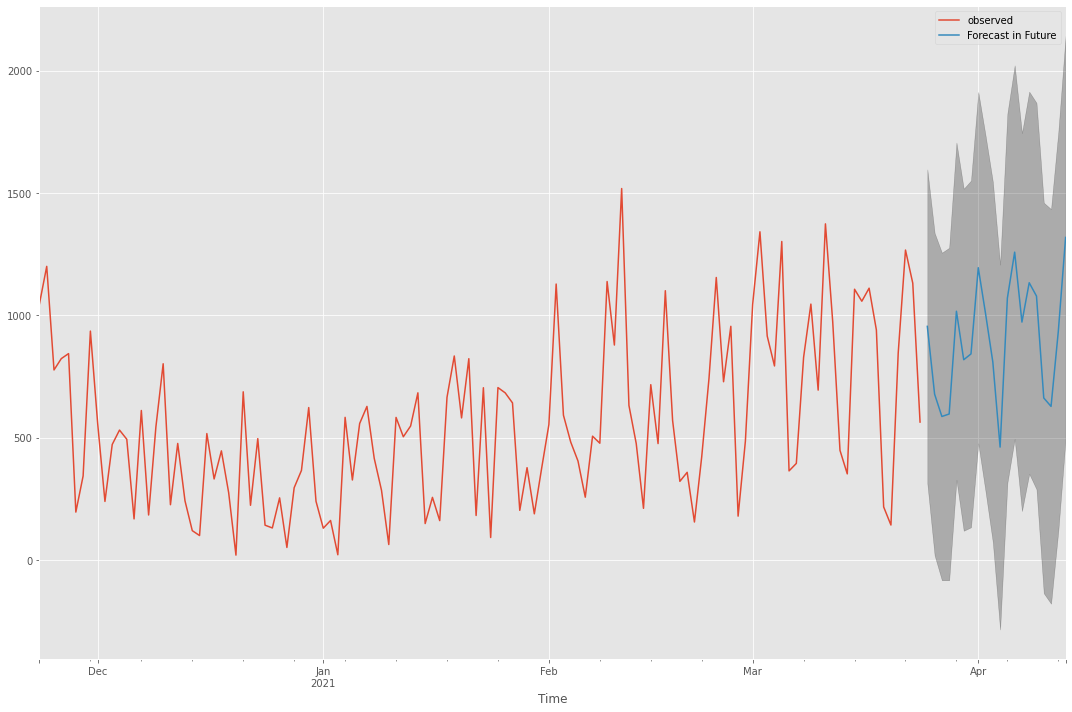

In [8]:
from arima_method import *

bucket_size = "D" # day
d_tt = df["TodayTotal"][-400:]
df_avg = bucket_avg(d_tt, bucket_size)

# Prediction on observed data starting on pred_start
# observed and prediction starting dates in plots
plot_start = '2020-09-01 00:00:00'
pred_start = '2021-01-01 00:00:00'

ts_label = ''

# One-step ahead forecasts
dynamic = False
arima.pred(df_avg, plot_start, pred_start, dynamic, ts_label)

# Dynamic forecasts
dynamic = True
arima.pred(df_avg, plot_start, pred_start, dynamic, ts_label)

# Forecasts to unseen future data
n_steps = 20  # next step * bucket size (30 min, 1D...) In this case = 30*1D = 30 days
arima.forcast(df_avg, n_steps, ts_label)